In [11]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
from tqdm import tqdm

import sys
sys.path.append('D:\diplom_2\my_test')
import my_funcs as mf

import my_advection_funcs as maf

### **0. Fact**

Доля 1: 9.901


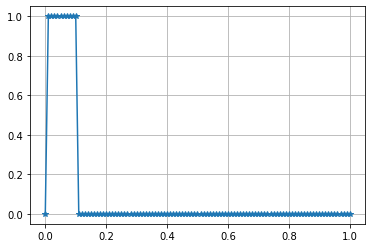

In [12]:
n=101
L=1
T=1
kurant=0.5

h=L/(n-1)
tau=kurant*h

b=(n-1)*0.1 #width % of L

l=[i/(n-1) for i in range(0,n)]
v=[1 if i in range(1,int(b)+1) else 0 for i in range(0,n) ]
print('Доля 1:',np.round(100*v.count(1)/len(v),3))

plt.plot(l,v,'-*')
plt.grid()

In [13]:
folder_to_save_png='data/output/png/'

### **1. Upwind 1st order**

CPU times: total: 203 ms
Wall time: 192 ms


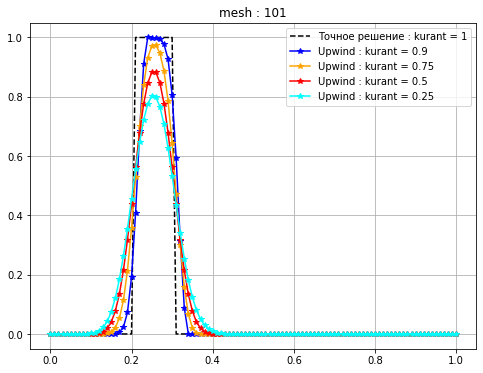

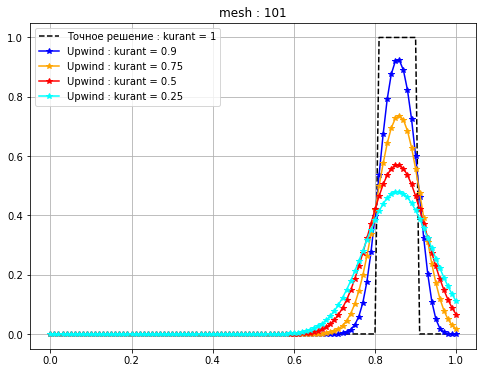

In [14]:
%%time

final_time=0.2
fact_v,_=maf.advection_upwind(v,final_time,1,h,n)
new_v_0_50,_=maf.advection_upwind(v,final_time,0.5,h,n)
new_v_0_75,_=maf.advection_upwind(v,final_time,0.75,h,n)
new_v_0_90,_=maf.advection_upwind(v,final_time,0.90,h,n)
new_v_0_25,_=maf.advection_upwind(v,final_time,0.25,h,n)
plt.figure(figsize=(8,6))
plt.plot(l,fact_v,'--',label='Точное решение : kurant = 1',color='black')
plt.plot(l,new_v_0_90,'-*',label=r'Upwind : kurant = 0.9',color='blue')
plt.plot(l,new_v_0_75,'-*',label=r'Upwind : kurant = 0.75',color='orange')
plt.plot(l,new_v_0_50,'-*',label=r'Upwind : kurant = 0.5',color='red')
plt.plot(l,new_v_0_25,'-*',label=r'Upwind : kurant = 0.25',color='cyan')
plt.legend()
plt.grid()
plt.title(fr'mesh : {n}')

final_time=0.8
fact_v,_=maf.advection_upwind(v,final_time,1.0,h,n)
new_v_0_50,_=maf.advection_upwind(v,final_time,0.5,h,n)
new_v_0_75,_=maf.advection_upwind(v,final_time,0.75,h,n)
new_v_0_90,_=maf.advection_upwind(v,final_time,0.90,h,n)
new_v_0_25,_=maf.advection_upwind(v,final_time,0.25,h,n)
plt.figure(figsize=(8,6))
plt.plot(l,fact_v,'--',label='Точное решение : kurant = 1',color='black')
plt.plot(l,new_v_0_90,'-*',label=r'Upwind : kurant = 0.9',color='blue')
plt.plot(l,new_v_0_75,'-*',label=r'Upwind : kurant = 0.75',color='orange')
plt.plot(l,new_v_0_50,'-*',label=r'Upwind : kurant = 0.5',color='red')
plt.plot(l,new_v_0_25,'-*',label=r'Upwind : kurant = 0.25',color='cyan')
plt.legend()
plt.grid()
plt.title(fr'mesh : {n}')
plt.savefig(folder_to_save_png+'upwind_1order.png')

### **2. Upwind 3rd order**

CPU times: total: 1min 26s
Wall time: 1min 27s


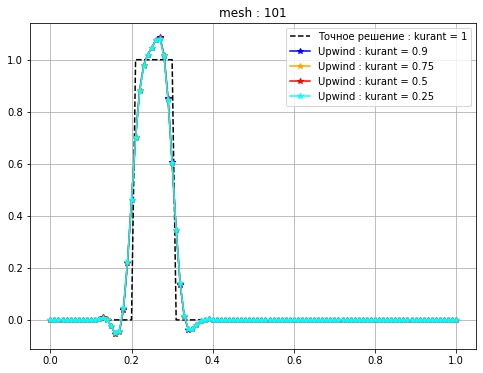

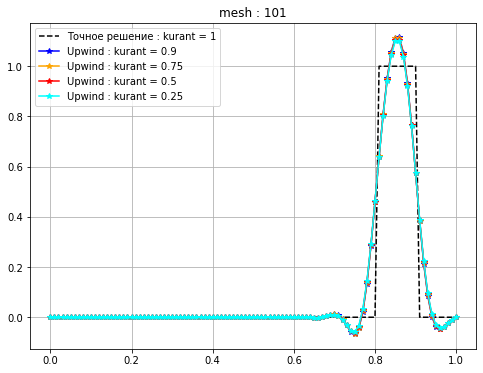

In [19]:
%%time

final_time=0.2
fact_v,_=maf.advection_upwind(v,final_time,1,h,n)
new_v_0_50,_=maf.advection_upwind(v,final_time,0.5,h,n,order=3)
new_v_0_75,_=maf.advection_upwind(v,final_time,0.75,h,n,order=3)
new_v_0_90,_=maf.advection_upwind(v,final_time,0.90,h,n,order=3)
new_v_0_25,_=maf.advection_upwind(v,final_time,0.25,h,n,order=3)
plt.figure(figsize=(8,6))
plt.plot(l,fact_v,'--',label='Точное решение : kurant = 1',color='black')
plt.plot(l,new_v_0_90,'-*',label=r'Upwind : kurant = 0.9',color='blue')
plt.plot(l,new_v_0_75,'-*',label=r'Upwind : kurant = 0.75',color='orange')
plt.plot(l,new_v_0_50,'-*',label=r'Upwind : kurant = 0.5',color='red')
plt.plot(l,new_v_0_25,'-*',label=r'Upwind : kurant = 0.25',color='cyan')
plt.legend()
plt.grid()
plt.title(fr'mesh : {n}')

final_time=0.8
fact_v,_=maf.advection_upwind(v,final_time,1.0,h,n)
new_v_0_50,_=maf.advection_upwind(v,final_time,0.5,h,n,order=3)
new_v_0_75,_=maf.advection_upwind(v,final_time,0.75,h,n,order=3)
new_v_0_90,_=maf.advection_upwind(v,final_time,0.90,h,n,order=3)
new_v_0_25,_=maf.advection_upwind(v,final_time,0.25,h,n,order=3)
new_v_0_01,_=maf.advection_upwind(v,final_time,0.01,h,n,order=3)
plt.figure(figsize=(8,6))
plt.plot(l,fact_v,'--',label='Точное решение : kurant = 1',color='black')
plt.plot(l,new_v_0_90,'-*',label=r'Upwind : kurant = 0.9',color='blue')
plt.plot(l,new_v_0_75,'-*',label=r'Upwind : kurant = 0.75',color='orange')
plt.plot(l,new_v_0_50,'-*',label=r'Upwind : kurant = 0.5',color='red')
plt.plot(l,new_v_0_25,'-*',label=r'Upwind : kurant = 0.25',color='cyan')
plt.legend()
plt.grid()
plt.title(fr'mesh : {n}')
plt.savefig(folder_to_save_png+'upwind_3order.png')

### **3.Central-difference 2-order**

CPU times: total: 50 s
Wall time: 50.2 s


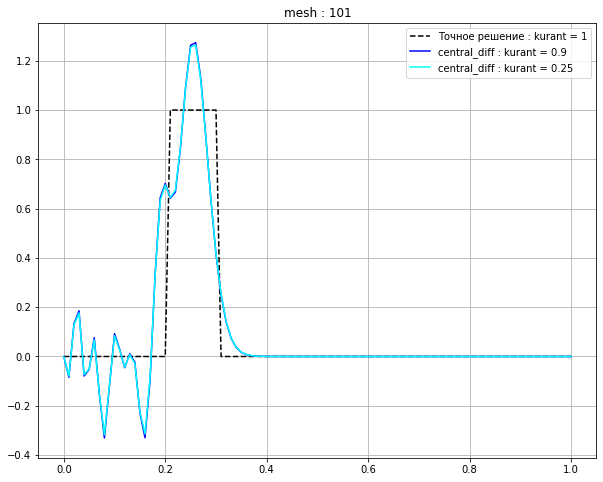

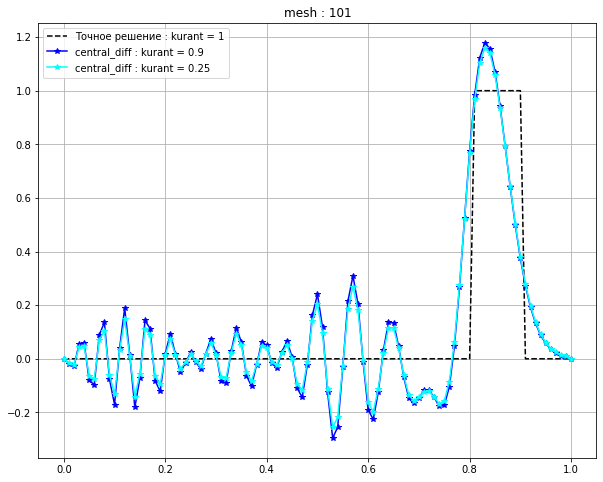

In [16]:
%%time

final_time=0.2
fact_v,_=maf.advection_upwind(v,final_time,1,h,n)
new_v_0_90,_=maf.advetion_central_diff(v,final_time,0.90,h,n)
new_v_0_25,_=maf.advetion_central_diff(v,final_time,0.25,h,n)
new_v_0_01,_=maf.advetion_central_diff(v,final_time,0.01,h,n)
plt.figure(figsize=(10,8))
plt.plot(l,fact_v,'--',label='Точное решение : kurant = 1',color='black')
plt.plot(l,new_v_0_90,label=r'central_diff : kurant = 0.9',color='blue')
plt.plot(l,new_v_0_25,label=r'central_diff : kurant = 0.25',color='cyan')
plt.legend()
plt.grid()
plt.title(fr'mesh : {n}')

final_time=0.8
fact_v,_=maf.advection_upwind(v,final_time,1,h,n)
new_v_0_90,_=maf.advetion_central_diff(v,final_time,0.90,h,n)
new_v_0_25,_=maf.advetion_central_diff(v,final_time,0.25,h,n)
new_v_0_01,_=maf.advetion_central_diff(v,final_time,0.01,h,n)
plt.figure(figsize=(10,8))
plt.plot(l,fact_v,'--',label='Точное решение : kurant = 1',color='black')
plt.plot(l,new_v_0_90,'-*',label=r'central_diff : kurant = 0.9',color='blue')
plt.plot(l,new_v_0_25,'-*',label=r'central_diff : kurant = 0.25',color='cyan')
plt.legend()
plt.grid()
plt.title(fr'mesh : {n}')
plt.savefig(folder_to_save_png+'centr_diff_2order.png')

### **4.Central-difference 4-order**

CPU times: total: 5.34 s
Wall time: 5.36 s


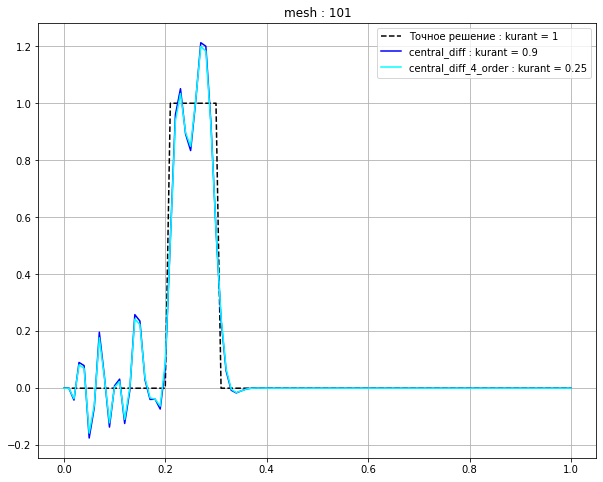

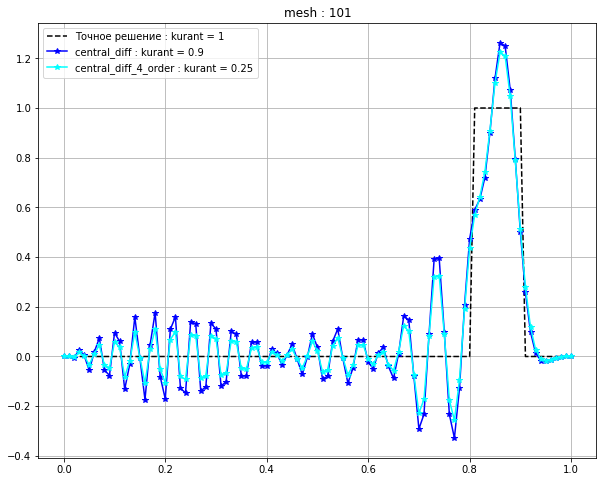

In [20]:
%%time

final_time=0.2
fact_v,_=maf.advection_upwind(v,final_time,1,h,n)
new_v_0_90,_=maf.advetion_central_diff(v,final_time,0.90,h,n,order=4)
new_v_0_25,_=maf.advetion_central_diff(v,final_time,0.25,h,n,order=4)
plt.figure(figsize=(10,8))
plt.plot(l,fact_v,'--',label='Точное решение : kurant = 1',color='black')
plt.plot(l,new_v_0_90,label=r'central_diff : kurant = 0.9',color='blue')
plt.plot(l,new_v_0_25,label=r'central_diff_4_order : kurant = 0.25',color='cyan')
plt.legend()
plt.grid()
plt.title(fr'mesh : {n}')

final_time=0.8
fact_v,_=maf.advection_upwind(v,final_time,1,h,n)
new_v_0_90,_=maf.advetion_central_diff(v,final_time,0.90,h,n,order=4)
new_v_0_25,_=maf.advetion_central_diff(v,final_time,0.25,h,n,order=4)
plt.figure(figsize=(10,8))
plt.plot(l,fact_v,'--',label='Точное решение : kurant = 1',color='black')
plt.plot(l,new_v_0_90,'-*',label=r'central_diff : kurant = 0.9',color='blue')
plt.plot(l,new_v_0_25,'-*',label=r'central_diff_4_order : kurant = 0.25',color='cyan')
plt.legend()
plt.grid()
plt.title(fr'mesh : {n}')
plt.savefig(folder_to_save_png+'centr_diff_4order.png')